# Plot `ee.FeatureCollection` objects using matplotlib

The `geetools` extension contains a set of functions for rendering charts from `ee.FeatureCollection` objects. The choice of function determines the arrangement of data in the chart, i.e., what defines x- and y-axis values and what defines the series. Use the following function descriptions and examples to determine the best function and chart type for your purpose.

[![github](https://img.shields.io/badge/-see%20sources-white?logo=github&labelColor=555)](https://github.com/gee-community/geetools/blob/main/docs/example/plot_featureCollection.ipynb)
[![colab](https://img.shields.io/badge/-open%20in%20colab-blue?logo=googlecolab&labelColor=555)](https://colab.research.google.com/github/gee-community/geetools/blob/main/docs/example/plot_featureCollection.ipynb)

## Set up environment

Install all the required libs if necessary and perform the import statements upstream.

In [1]:
# uncomment if installation of libs is necessary
# !pip install earthengine-api geetools
import ee, geetools, pytest_gee

pytest_gee.init_ee_from_service_account()

In [2]:
from matplotlib import pyplot as plt

import ee
import geetools #noqa: F401

In [3]:
# uncomment if authetication to GEE is needed
# ee.Authenticate()

In [4]:
# uncomment if initialization is required
# ee.Initialize()

## Example data

The following examples rely on a FeatureCollection composed of three ecoregion features with properties that describe climate normals.

In [5]:
# Import the example feature collection.
ecoregions = ee.FeatureCollection('projects/google/charts_feature_example')

## ee.FeatureCollection.geetools.plot_by_features

### Column chart

Features are plotted along the x-axis, labeled by values of a selected property. Series are represented by adjacent columns defined by a list of property names whose values are plotted along the y-axis.

{'apr': {'Desert': 14.251640262603761, 'Forest': 7.120137078551952, 'Grassland': 7.7213063400332675}, 'aug': {'Desert': 23.845259066990447, 'Forest': 17.919982716498247, 'Grassland': 21.848346125906527}, 'dec': {'Desert': 5.641385506221227, 'Forest': 2.317885516018703, 'Grassland': -3.4267057673087833}, 'feb': {'Desert': 7.6450114270619, 'Forest': 3.609074035652296, 'Grassland': -1.9902201443796765}, 'jan': {'Desert': 5.791035977772305, 'Forest': 2.792466754200815, 'Grassland': -3.7566084167809777}, 'jul': {'Desert': 25.06657654081073, 'Forest': 17.850177143725396, 'Grassland': 22.753059371178896}, 'jun': {'Desert': 23.790505815233505, 'Forest': 13.776134290000945, 'Grassland': 19.033557568368703}, 'mar': {'Desert': 10.454658155441285, 'Forest': 5.032931559387294, 'Grassland': 2.5701463153291244}, 'may': {'Desert': 19.0328149005345, 'Forest': 10.395376066595201, 'Grassland': 13.643875216053496}, 'nov': {'Desert': 9.84932084628514, 'Forest': 4.784705665376451, 'Grassland': 2.02191836347

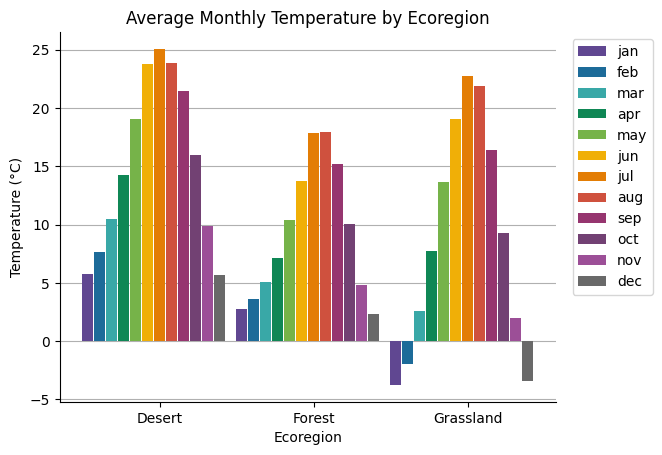

In [6]:
fig, ax = plt.subplots()

# initialize the plot with the ecoregions data
ecoregions.geetools.plot_by_features(
    type = "bar",
    featureId = "label",
    properties = ['01_tmean', '02_tmean', '03_tmean', '04_tmean', '05_tmean', '06_tmean', '07_tmean', '08_tmean', '09_tmean', '10_tmean', '11_tmean', '12_tmean'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ['#604791', '#1d6b99', '#39a8a7', '#0f8755', '#76b349', '#f0af07', '#e37d05', '#cf513e', '#96356f', '#724173', '#9c4f97', '#696969'],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Temperature by Ecoregion")
ax.set_xlabel("Ecoregion")
ax.set_ylabel("Temperature (°C)")
plt.show()

### Stacked column chart

Features are plotted along the x-axis, labeled by values of a selected property. Series are represented by stacked columns defined by a list of property names whose values are plotted along the y-axis as the cumulative series sum.

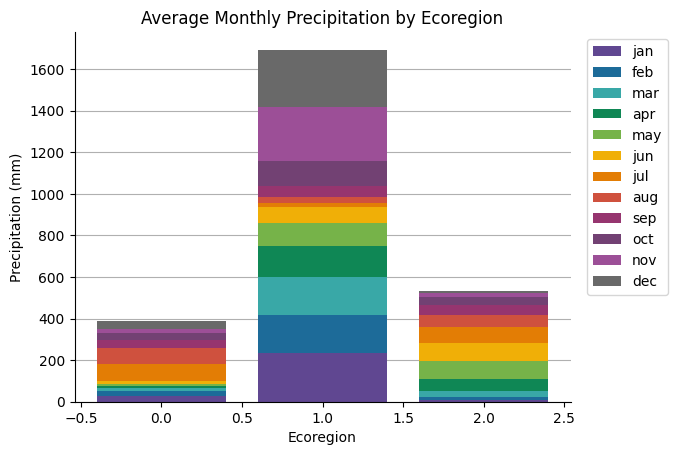

In [7]:
fig, ax = plt.subplots()

# initialize theplot with the ecoregions data
ecoregions.geetools.plot_by_features(
    type = "stacked",
    featureId = "label",
    properties = ['01_ppt', '02_ppt', '03_ppt', '04_ppt', '05_ppt', '06_ppt', '07_ppt', '08_ppt', '09_ppt', '10_ppt', '11_ppt', '12_ppt'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ['#604791', '#1d6b99', '#39a8a7', '#0f8755', '#76b349', '#f0af07', '#e37d05', '#cf513e', '#96356f', '#724173', '#9c4f97', '#696969'],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Ecoregion")
ax.set_ylabel("Precipitation (mm)")
plt.show()

### Scatter chart

Features are plotted along the x-axis, labeled by values of a selected property. Series are represented by points defined by a list of property names whose values are plotted along the y-axis.

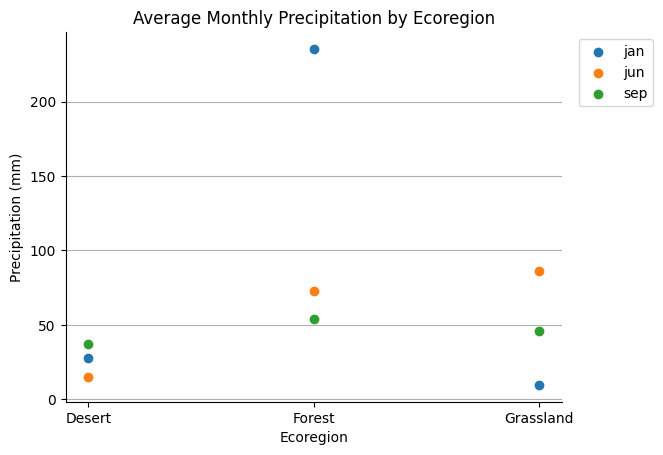

In [8]:
fig, ax = plt.subplots()

# initialize theplot with the ecoregions data
ecoregions.geetools.plot_by_features(
    type = "scatter",
    featureId = "label",
    properties = ['01_ppt', '06_ppt', '09_ppt'],
    labels = ["jan", "jun", "sep"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Ecoregion")
ax.set_ylabel("Precipitation (mm)")
plt.show()

### Pie chart

The pie is a property, each slice is the share from each feature whose value is cast as a percentage of the sum of all values of features composing the pie.

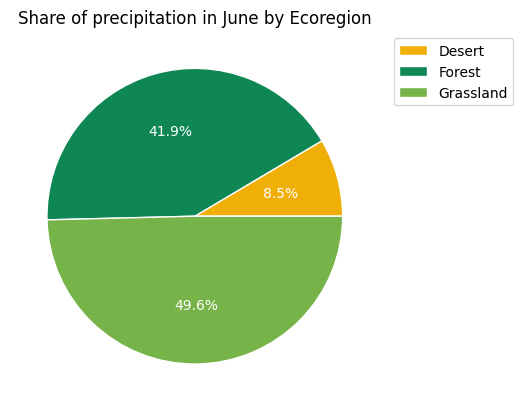

In [9]:
fig, ax = plt.subplots()

# initialize theplot with the ecoregions data
ecoregions.geetools.plot_by_features(
    type = "pie",
    featureId = "label",
    properties = ['06_ppt'],
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Share of precipitation in June by Ecoregion")
plt.show()

### Donut chart

The donut is a property, each slice is the share from each feature whose value is cast as a percentage of the sum of all values of features composing the donut.

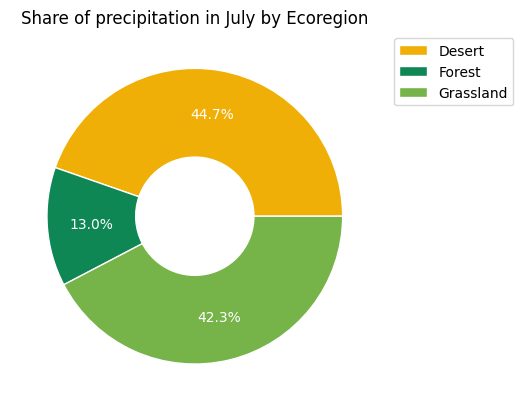

In [10]:
fig, ax = plt.subplots()

# initialize theplot with the ecoregions data
ecoregions.geetools.plot_by_features(
    type = "donut",
    featureId = "label",
    properties = ['07_ppt'],
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Share of precipitation in July by Ecoregion")
plt.show()

## ee.FeatureCollection.geetools.plot_by_properties

## Column chart

Feature properties are plotted along the x-axis, labeled and sorted by a dictionary input; the values of the given properties are plotted along the y-axis. Series are features, represented by columns, labeled by values of a selected property.

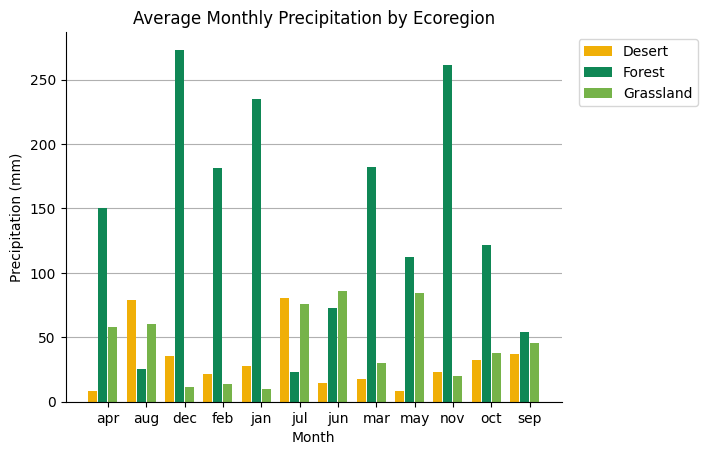

In [11]:
fig, ax = plt.subplots()


# initialize theplot with the ecoregions data
ax = ecoregions.geetools.plot_by_properties(
    type = "bar",
    properties = ['01_ppt', '02_ppt', '03_ppt', '04_ppt', '05_ppt', '06_ppt', '07_ppt', '08_ppt', '09_ppt', '10_ppt', '11_ppt', '12_ppt'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    featureId = "label",
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)")
plt.show()

## Line chart

Feature properties are plotted along the x-axis, labeled and sorted by a dictionary input; the values of the given properties are plotted along the y-axis. Series are features, represented by columns, labeled by values of a selected property.

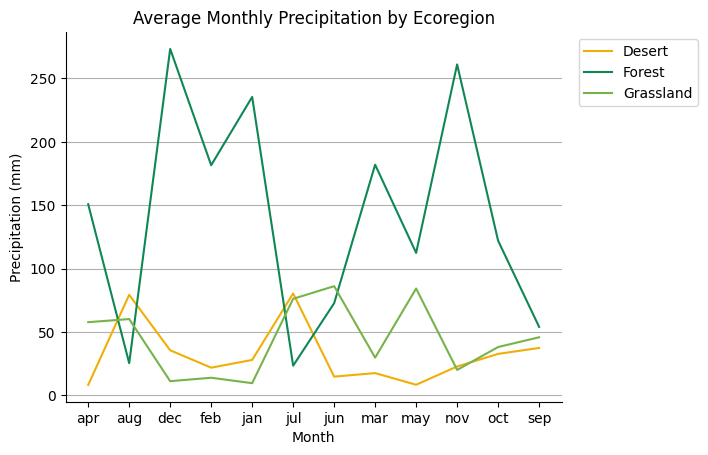

In [12]:
fig, ax = plt.subplots()

# initialize theplot with the ecoregions data
ax = ecoregions.geetools.plot_by_properties(
    type = "plot",
    properties = ["01_ppt", "02_ppt", "03_ppt", "04_ppt", "05_ppt", "06_ppt", "07_ppt", "08_ppt", "09_ppt", "10_ppt", "11_ppt", "12_ppt"],
    featureId = "label",
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)")
plt.show()

### Area chart 

Feature properties are plotted along the x-axis, labeled and sorted by a dictionary input; the values of the given properties are plotted along the y-axis. Series are features, represented by lines and shaded areas, labeled by values of a selected property.

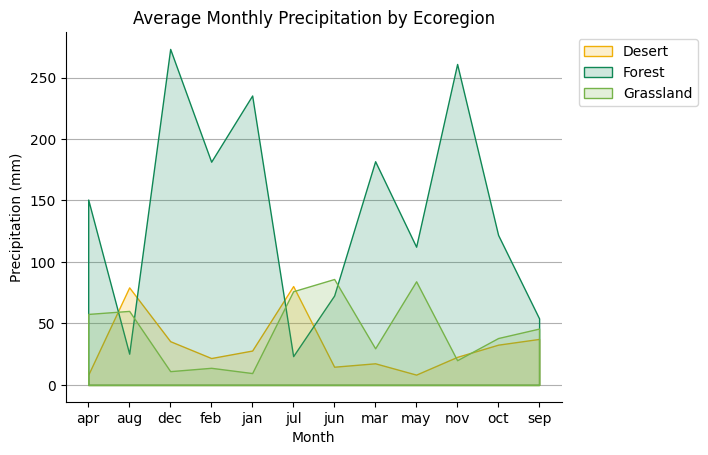

In [13]:
fig, ax = plt.subplots()

# initialize the plot with the ecoregions data
ax = ecoregions.geetools.plot_by_properties(
    type = "fill_between",
    properties = ["01_ppt", "02_ppt", "03_ppt", "04_ppt", "05_ppt", "06_ppt", "07_ppt", "08_ppt", "09_ppt", "10_ppt", "11_ppt", "12_ppt"],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    featureId = "label",
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)")
plt.show()

## ee.FeatureCollection.geetools.plot_hist

The x-axis is defined by value bins for the range of values of a selected property; the y-axis is the number of elements in the given bin.

/home/prambaud/miniconda3/envs/geetools/lib/python3.11/site-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for OREGONSTATE/PRISM/Norm81m! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/OREGONSTATE_PRISM_Norm81m

  warnings.warn(warning, category=DeprecationWarning)


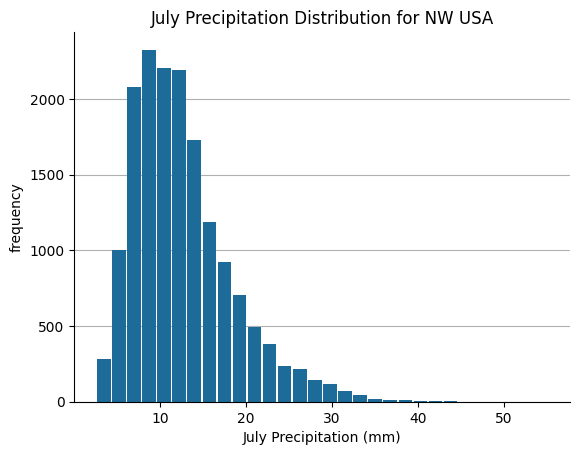

In [14]:
fig, ax = plt.subplots()

# load some data
normClim = ee.ImageCollection('OREGONSTATE/PRISM/Norm81m').toBands()

# Make a point sample of climate variables for a region in western USA.
region = ee.Geometry.Rectangle(-123.41, 40.43, -116.38, 45.14)
climSamp = normClim.sample(region, 5000)


# initialize the plot with the ecoregions data
ax = climSamp.geetools.plot_hist(
    property = "07_ppt",
    label = "July Precipitation (mm)",
    color = '#1d6b99',
    ax = ax,
    bins = 30
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("July Precipitation Distribution for NW USA")
plt.show()